## Prepare

- check torch version
- check mps(Mac M4 Chip) availability
- update device on mps

In [1]:
import torch
print(torch.__version__)
print(torch.backends.mps.is_available())  # Should return True
print(torch.backends.mps.is_built())      # Should return True

2.5.1
True
True


In [ ]:
# Use MPS if available
device = "mps" if torch.backends.mps.is_available() else "cpu"
dtype = torch.float32  # MPS currently prefers float32

print(f"Using Device: {device}")
print(f"works on dtype: {dtype}")

Using Device: mps
works on dtype: torch.float32


**Testing** on a open source hugging face stable diffusion model:

In [ ]:
from diffusers import StableDiffusionPipeline

model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=dtype)
pipe = pipe.to(device)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")


100%|██████████| 50/50 [01:10<00:00,  1.42s/it]


# **Journey Start**

## Import

In [16]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image, ImageDraw
import random
from IPython.display import display  # Import the display function

## 1. Generate Styled Words with AI

In [11]:
# Load Stable Diffusion pipeline
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=dtype)
pipe = pipe.to(device)


# Define prompts for each word
prompts = {
    "Spanish": "The single word 'hermosa' in elegant cursive font, floral patterns, vibrant colors, watercolor painting",
    "Arabic": "The single word 'جَمِيلٌ' in gold Arabic calligraphy, intricate islamic geometric patterns, beige background",
    "Japanese": "The single word '美しい' in bold black brushstrokes, minimalist Japanese ink painting, white background",
    "Chinese": "The single word '美丽' in Chinese Lunar New Year Festival's vibes, calligraphy in gold ink and red background",
}


# Generate images
for lang, prompt in prompts.items():
    image = pipe(prompt, height=512, width=512).images[0]
    image.save(f"{lang}_beautiful.png")

100%|██████████| 50/50 [01:08<00:00,  1.38s/it]


## 2. Create a Colorful Background

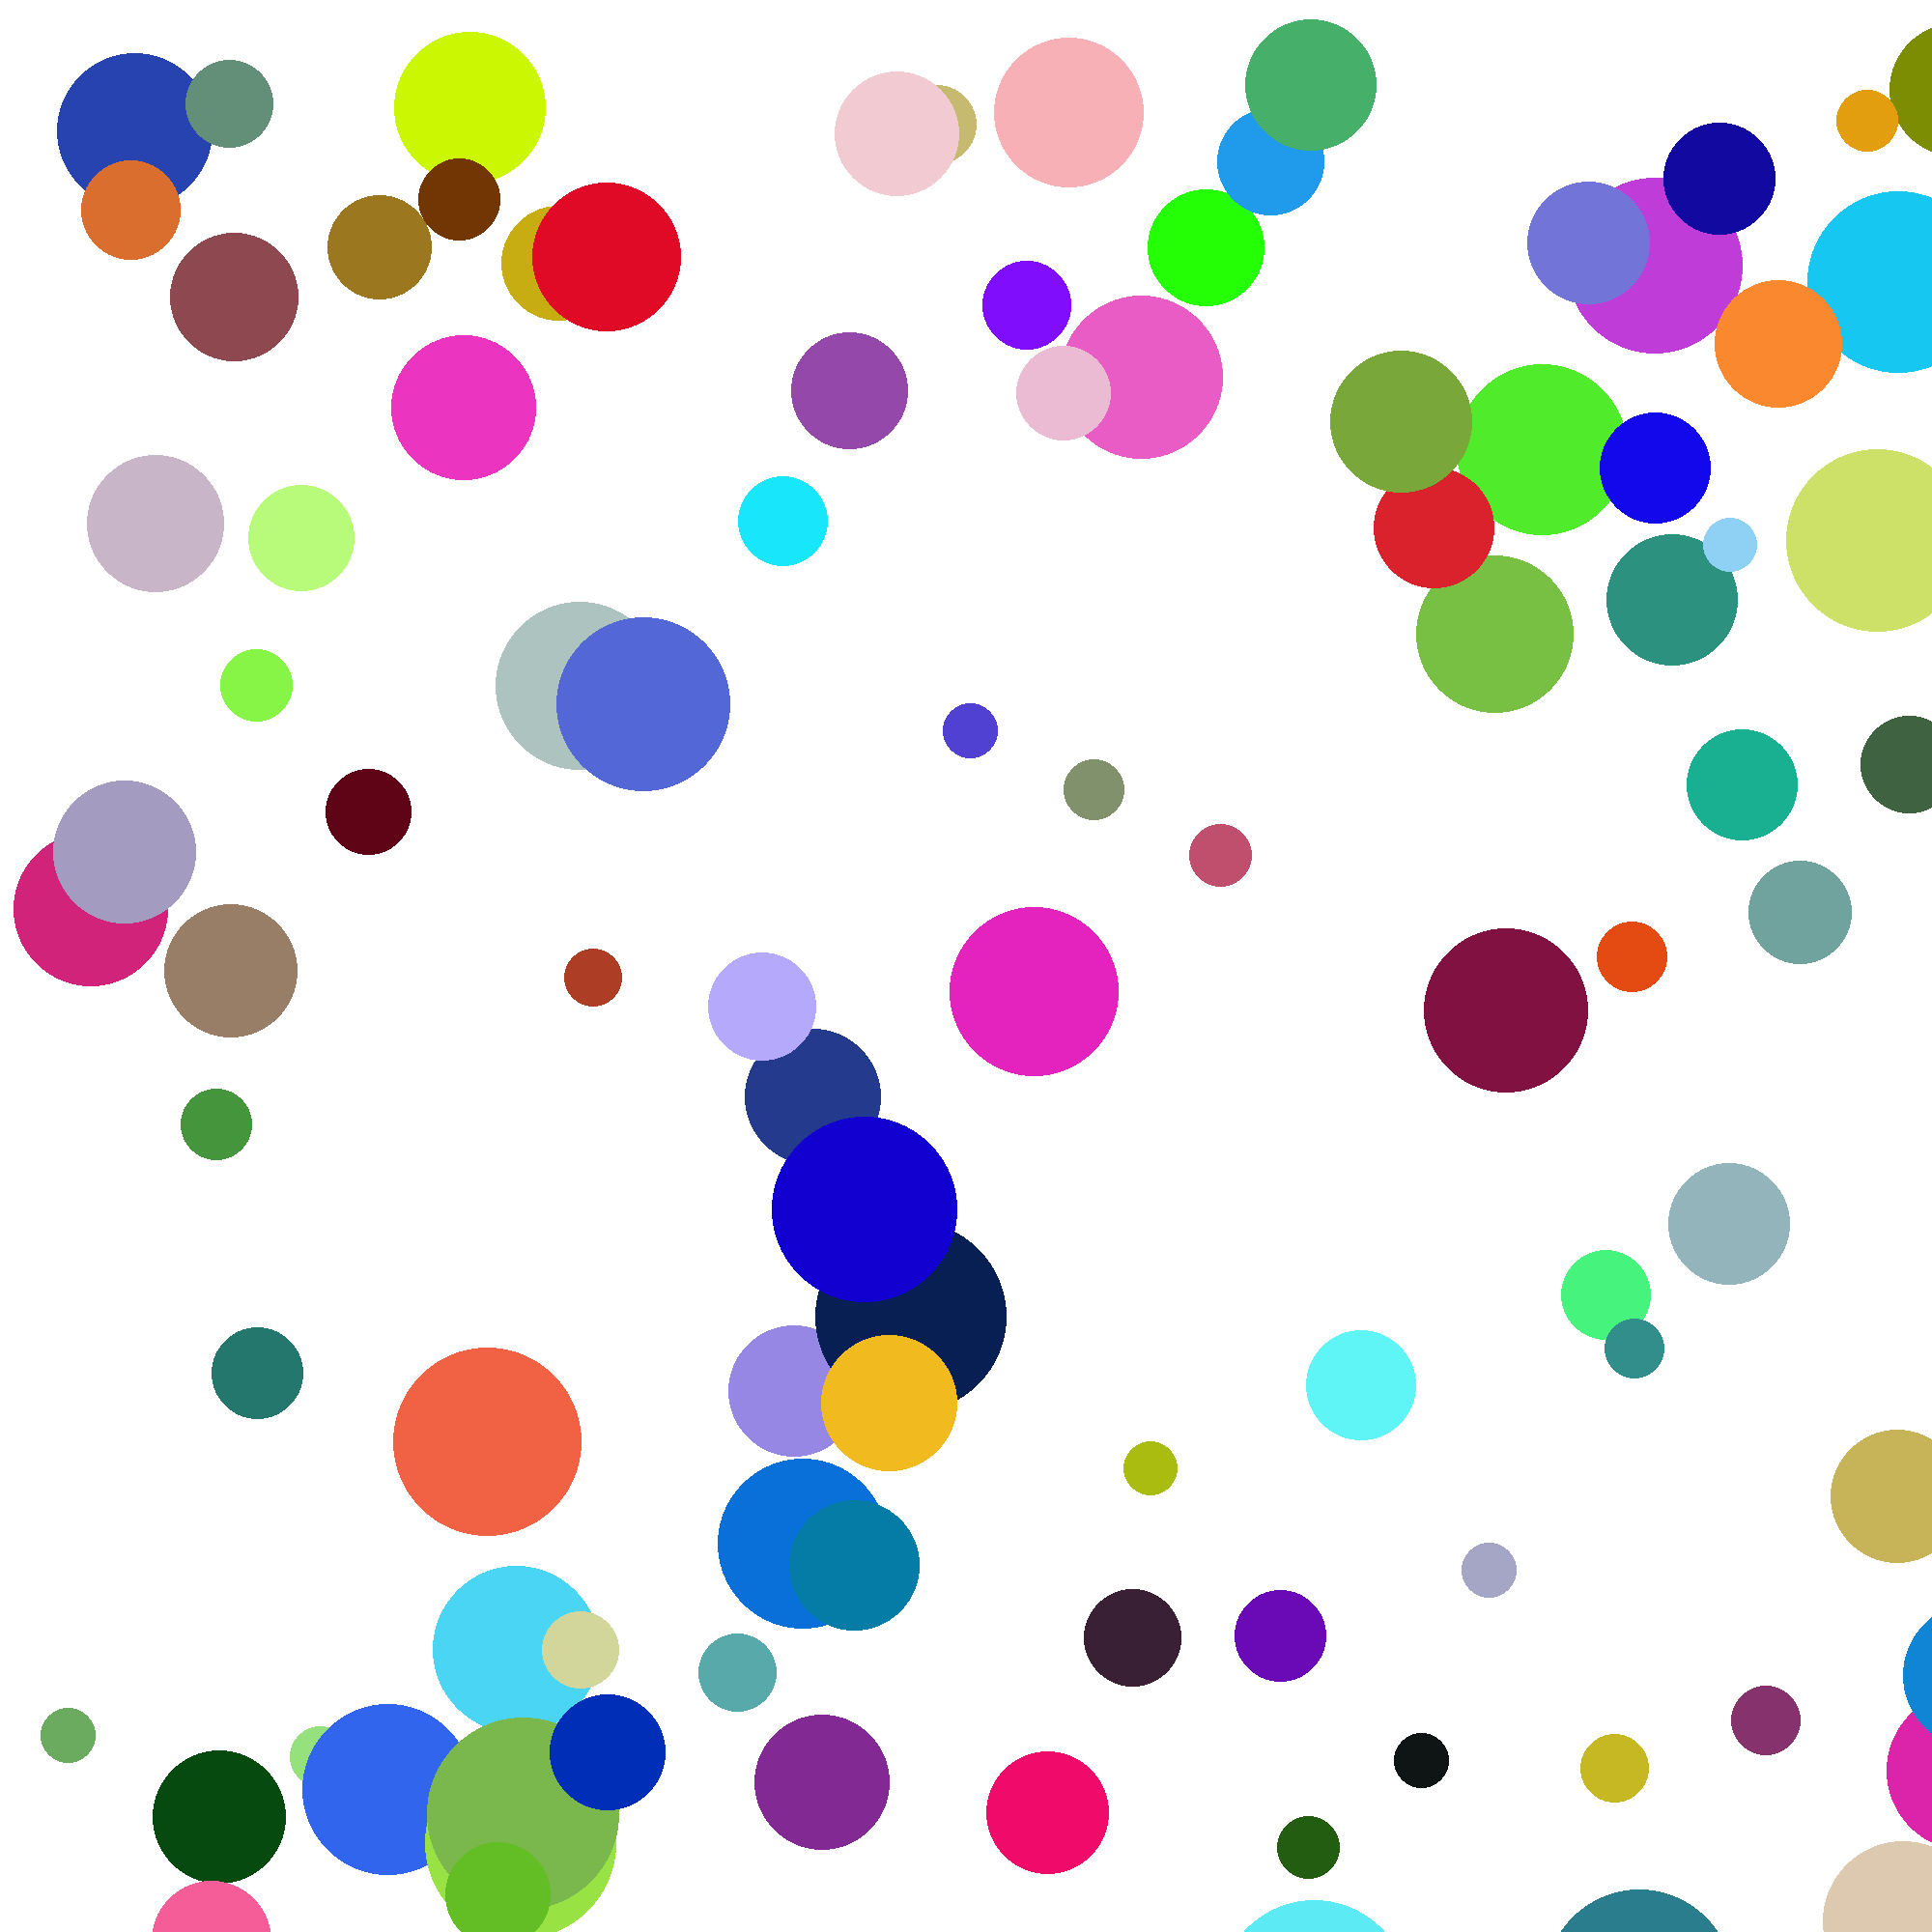

In [13]:
# Create a blank canvas
width, height = 2000, 2000
background = Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(background)

# Add random colorful circles
for _ in range(100):
    x, y = random.randint(0, width), random.randint(0, height)
    radius = random.randint(50, 200)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    draw.ellipse([x, y, x + radius, y + radius], fill=color, outline=None)

# Display the image in the notebook
display(background)


In [14]:
background.save("background.png")

In [ ]:
PROMPTS = {
    'Spanish': "The single word 'hermosa' in elegant cursive font, floral patterns, vibrant colors, watercolor painting",
    'Arabic': "The single word 'جَمِيلٌ' in gold Arabic calligraphy, intricate islamic geometric patterns, beige background",
    'Japanese': "The single word '美しい' in bold black brushstrokes, minimalist Japanese ink painting, white background",
    'Chinese': "The single word '美丽' in Chinese Lunar New Year Festival's vibes, calligraphy in gold ink and red background",
}

a = PROMPTS.keys()
type(a), a

## 3. Assemble the Artwork

Background image loaded successfully.
Loaded Spanish_beautiful.png successfully.
converting image Spanish to RGBA
Loaded Arabic_beautiful.png successfully.
converting image Arabic to RGBA
Loaded Japanese_beautiful.png successfully.
converting image Japanese to RGBA
Loaded Chinese_beautiful.png successfully.
converting image Chinese to RGBA


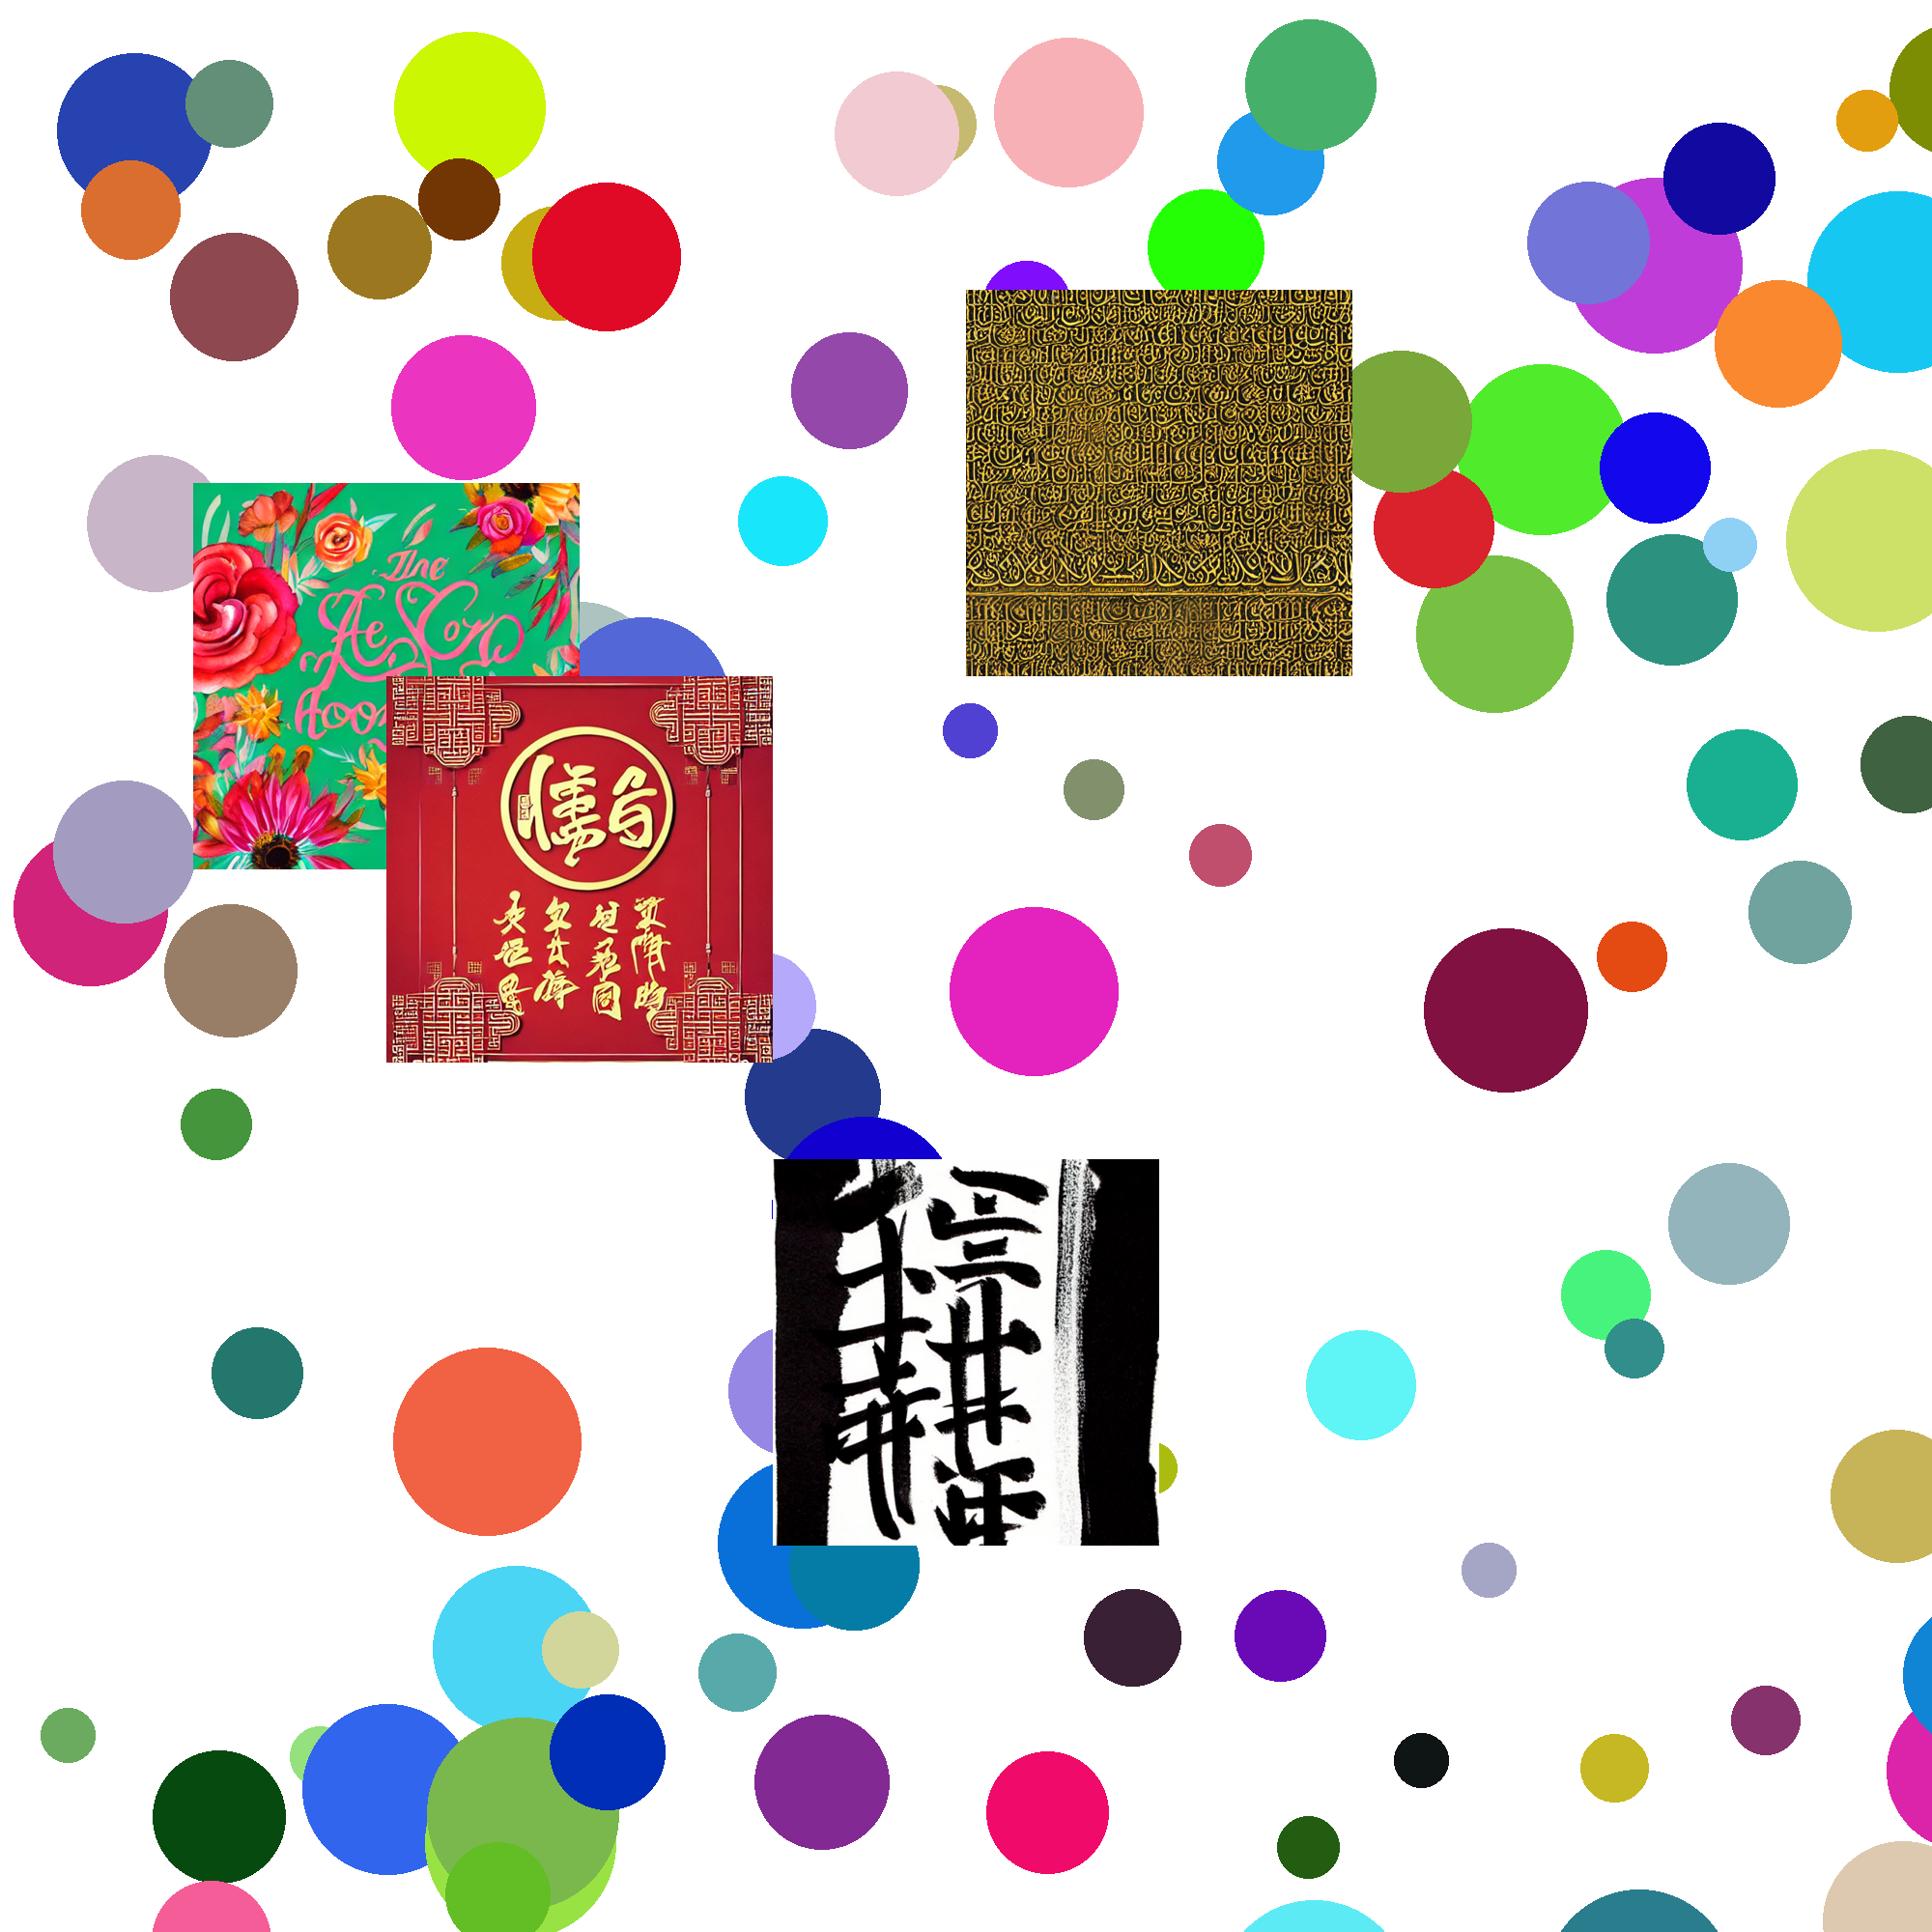

In [18]:
# Load background
try:
    background = Image.open("background.png")
    print("Background image loaded successfully.")
except FileNotFoundError:
    print("Error: 'background.png' not found. Please check the file path.")
    exit()

# Define positions (adjust these coordinates as needed)
word_positions = {
    "Spanish": (200, 500),
    "Arabic": (1000, 300),
    "Japanese": (800, 1200),
    "Chinese": (400, 700),
}

# Paste each word onto the background
for lang, pos in word_positions.items():
    try:
        # Load the word image
        word_img_path = f"{lang}_beautiful.png"
        word_img = Image.open(word_img_path)
        print(f"Loaded {word_img_path} successfully.")

        # Resize if needed
        word_img = word_img.resize((400, 400))

        # Ensure the word image has an alpha channel (transparency)
        if word_img.mode != "RGBA":
            print(f"converting image {lang} to RGBA")
            word_img = word_img.convert("RGBA")

        # Paste the word image onto the background
        background.paste(word_img, pos, mask=word_img)
    except FileNotFoundError:
        print(f"Error: {word_img_path} not found. Skipping this language.")
    except Exception as e:
        print(f"Error processing {word_img_path}: {e}")

# Display the final image
display(background)

In [19]:
background.save("final_art.png")

## 4. Expand to a Web App (Optional)

Run with: streamlit run app.py